An Edutech company sells online courses to industry professionals. When visitors come to the website and fill up
a form providing their email address or phone number, they are classified as a lead. Once these leads are
acquired, employees from the sales team start making calls, writing emails, etc. Through this process,
some of the leads get converted while most do not. The typical lead conversion rate at the company is
around 30%. Now, although the company gets a lot of leads, its lead conversion rate is very poor. The CEO
wants to identify hot leads to get conversion rate of 80%. (Among the selected hot leads)

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
# Load in the data
df = pd.read_csv('Leads.csv')

In [3]:
#Sanity Check
print(df.shape)
df.info()

(9240, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                     

#### Many of the features have too long names. It is better to rename them to short forms

In [4]:
#Making long feature names short
df.rename(columns={'Total Time Spent on Website': 'TimeSpent', 
                   'Page Views Per Visit': 'PageView', 
                   'How did you hear about X Education': 'HearAboutX',
                  'What is your current occupation':'CurrentOccupation',
                  'What matters most to you in choosing a course': 'MattersMost',
                  'Newspaper Article':'PaperArticle',
                  'Digital Advertisement':'DigitalAd',
                  'Receive More Updates About Our Courses':'GetMoreUpdate',
                  'I agree to pay the amount through cheque':'payByCheque',
                  'A free copy of Mastering The Interview':'Interview',
                  'X Education Forums':'Forum',
                  'Last Notable Activity':'LastNotableActivity',
                  'Through Recommendations':'ThroughRecom',
                  'Do Not Email':'NoEmail',
                  'Do Not Call':'NoCall'}, inplace=True)

### Checking for missing values

In [5]:
df.isnull().sum()

Prospect ID                             0
Lead Number                             0
Lead Origin                             0
Lead Source                            36
NoEmail                                 0
NoCall                                  0
Converted                               0
TotalVisits                           137
TimeSpent                               0
PageView                              137
Last Activity                         103
Country                              2461
Specialization                       1438
HearAboutX                           2207
CurrentOccupation                    2690
MattersMost                          2709
Search                                  0
Magazine                                0
PaperArticle                            0
Forum                                   0
Newspaper                               0
DigitalAd                               0
ThroughRecom                            0
GetMoreUpdate                     

In [6]:
# Checking the missing value percentage for each column
df.isnull().sum()*100/len(df)

Prospect ID                           0.000000
Lead Number                           0.000000
Lead Origin                           0.000000
Lead Source                           0.389610
NoEmail                               0.000000
NoCall                                0.000000
Converted                             0.000000
TotalVisits                           1.482684
TimeSpent                             0.000000
PageView                              1.482684
Last Activity                         1.114719
Country                              26.634199
Specialization                       15.562771
HearAboutX                           23.885281
CurrentOccupation                    29.112554
MattersMost                          29.318182
Search                                0.000000
Magazine                              0.000000
PaperArticle                          0.000000
Forum                                 0.000000
Newspaper                             0.000000
DigitalAd    

### Many features have a lot of missing values. Lets see if we can impute them.

In [7]:
#Checking the number of possible leads for every countries
country_val = df.groupby(['Country'])['Converted'].count()
country_val

Country
Asia/Pacific Region        2
Australia                 13
Bahrain                    7
Bangladesh                 2
Belgium                    2
Canada                     4
China                      2
Denmark                    1
France                     6
Germany                    4
Ghana                      2
Hong Kong                  7
India                   6492
Indonesia                  1
Italy                      2
Kenya                      1
Kuwait                     4
Liberia                    1
Malaysia                   1
Netherlands                2
Nigeria                    4
Oman                       6
Philippines                2
Qatar                     10
Russia                     1
Saudi Arabia              21
Singapore                 24
South Africa               4
Sri Lanka                  1
Sweden                     3
Switzerland                1
Tanzania                   1
Uganda                     2
United Arab Emirates      53
United

### India has the largest number of possible leads. It is because India is the main market for this company.

In [8]:
#Checking for missing values in Country
df['Country'].isnull().sum()

2461

In [9]:
#Replace missing values in country column by 'unknown'
df['Country'].fillna('unknown', inplace=True)

In [10]:
Specialization_values = df.groupby(['Specialization'])['Converted'].count()
Specialization_values

Specialization
Banking, Investment And Insurance     338
Business Administration               403
E-Business                             57
E-COMMERCE                            112
Finance Management                    976
Healthcare Management                 159
Hospitality Management                114
Human Resource Management             848
IT Projects Management                366
International Business                178
Marketing Management                  838
Media and Advertising                 203
Operations Management                 503
Retail Management                     100
Rural and Agribusiness                 73
Select                               1942
Services Excellence                    40
Supply Chain Management               349
Travel and Tourism                    203
Name: Converted, dtype: int64

In [11]:
#In the 'Specialization' attribute, there are 1942 observations with Select value and 1438 observations with missing value. 
#We assume that the respondents didn't select any value of this variable. 
#This is applicable for other variables that have value 'Select'. So we are replacing these observations with 'Not Given'.
df['Specialization'].fillna('Not Given', inplace=True)
df.replace('Select','Not Given',inplace=True ) #replace all 'select' value with 'not given'

In [12]:
df.isnull().sum()*100/len(df)

Prospect ID                           0.000000
Lead Number                           0.000000
Lead Origin                           0.000000
Lead Source                           0.389610
NoEmail                               0.000000
NoCall                                0.000000
Converted                             0.000000
TotalVisits                           1.482684
TimeSpent                             0.000000
PageView                              1.482684
Last Activity                         1.114719
Country                               0.000000
Specialization                        0.000000
HearAboutX                           23.885281
CurrentOccupation                    29.112554
MattersMost                          29.318182
Search                                0.000000
Magazine                              0.000000
PaperArticle                          0.000000
Forum                                 0.000000
Newspaper                             0.000000
DigitalAd    

In [13]:
# Checking for unique categories in City
df['City'].unique()

array(['Not Given', 'Mumbai', nan, 'Thane & Outskirts',
       'Other Metro Cities', 'Other Cities',
       'Other Cities of Maharashtra', 'Tier II Cities'], dtype=object)

In [14]:
#Replace missing values in City attribute by 'unknown'
df['City'].fillna('Not Given',inplace=True)

In [15]:
df['City'].unique()

array(['Not Given', 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [16]:
df.groupby(['City'])['Converted'].count()

City
Mumbai                         3222
Not Given                      3669
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Thane & Outskirts               752
Tier II Cities                   74
Name: Converted, dtype: int64

### Its better to put all the other cities except Mumbai and unknown in Tier II cities 

In [17]:
df['City'].replace(['Thane & Outskirts','Other Cities of Maharashtra','Other Cities','Other Metro Cities'],'Tier II Cities',inplace=True)

In [18]:
df['City'].unique()

array(['Not Given', 'Mumbai', 'Tier II Cities'], dtype=object)

In [19]:
df.City.isnull().sum()

0

In [20]:
df['Lead Source'].isnull().sum()

36

In [21]:
df['Lead Source'].nunique()

21

In [22]:
df.groupby(['Lead Source'])['Converted'].count()

Lead Source
Click2call              4
Direct Traffic       2543
Facebook               55
Google               2868
Live Chat               2
NC_EDM                  1
Olark Chat           1755
Organic Search       1154
Pay per Click Ads       1
Press_Release           2
Reference             534
Referral Sites        125
Social Media            2
WeLearn                 1
Welingak Website      142
bing                    6
blog                    1
google                  5
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Converted, dtype: int64

### Mode is Google. So we impute the missing values with Google

In [23]:
df['Lead Source'].fillna('Google',inplace=True)

In [24]:
df['Lead Source'].isnull().sum()

0

In [25]:
df.isnull().sum()

Prospect ID                             0
Lead Number                             0
Lead Origin                             0
Lead Source                             0
NoEmail                                 0
NoCall                                  0
Converted                               0
TotalVisits                           137
TimeSpent                               0
PageView                              137
Last Activity                         103
Country                                 0
Specialization                          0
HearAboutX                           2207
CurrentOccupation                    2690
MattersMost                          2709
Search                                  0
Magazine                                0
PaperArticle                            0
Forum                                   0
Newspaper                               0
DigitalAd                               0
ThroughRecom                            0
GetMoreUpdate                     

In [26]:
df.groupby(['Last Activity'])['Converted'].count()

Last Activity
Approached upfront                 9
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Email Marked Spam                  2
Email Opened                    3437
Email Received                     2
Form Submitted on Website        116
Had a Phone Conversation          30
Olark Chat Conversation          973
Page Visited on Website          640
Resubscribed to emails             1
SMS Sent                        2745
Unreachable                       93
Unsubscribed                      61
View in browser link Clicked       6
Visited Booth in Tradeshow         1
Name: Converted, dtype: int64

In [27]:
df['LastNotableActivity'].isnull().sum()

0

In [28]:
df['LastNotableActivity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

### Last Notable Activity can replace Last Activity

In [29]:
df.groupby(['TotalVisits'])['Converted'].count()

TotalVisits
0.0      2189
1.0       395
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
12.0       45
13.0       48
14.0       36
15.0       18
16.0       21
17.0       16
18.0       15
19.0        9
20.0       12
21.0        6
22.0        3
23.0        6
24.0        5
25.0        5
26.0        2
27.0        5
28.0        2
29.0        2
30.0        1
32.0        1
41.0        1
42.0        1
43.0        1
54.0        1
55.0        1
74.0        1
115.0       1
141.0       1
251.0       1
Name: Converted, dtype: int64

### We fill the missing values of TotalVisits with mode 0

In [30]:
df['TotalVisits'].fillna(0.0,inplace=True)

In [31]:
df['TotalVisits'] = df['TotalVisits'].astype(int)

In [32]:
# We convert Total visits into strings/categorical
df['TotalVisits'] = df['TotalVisits'].astype(str)

In [33]:
df['TotalVisits'].unique()

array(['0', '5', '2', '1', '4', '8', '11', '6', '3', '7', '13', '17', '9',
       '12', '10', '16', '14', '21', '15', '22', '19', '18', '20', '43',
       '30', '23', '55', '141', '25', '27', '29', '24', '28', '26', '74',
       '41', '54', '115', '251', '32', '42'], dtype=object)

In [34]:
df['HearAboutX'].fillna('Unknown',inplace=True)

In [35]:
df['CurrentOccupation'].fillna('Not Given', inplace=True)
df['MattersMost'].fillna('Not Given', inplace=True)

In [36]:
df.groupby(['Lead Profile'])['Converted'].count()

Lead Profile
Dual Specialization Student      20
Lateral Student                  24
Not Given                      4146
Other Leads                     487
Potential Lead                 1613
Student of SomeSchool           241
Name: Converted, dtype: int64

In [38]:
df['Lead Profile'].fillna('Not Given', inplace=True)

In [39]:
#We can drop some unnecessary variables after checking the data dictionary..
df_final = df.drop(['Prospect ID', 'Lead Number', 'Tags','Asymmetrique Activity Index', 
                    'Asymmetrique Profile Index','Asymmetrique Activity Score',
                    'Asymmetrique Profile Score', 'Lead Quality', 
                    'Update me on Supply Chain Content', 'Get updates on DM Content','payByCheque', 'GetMoreUpdate', 'Last Activity','Magazine'], axis=1)
df_final.isnull().sum()

Lead Origin              0
Lead Source              0
NoEmail                  0
NoCall                   0
Converted                0
TotalVisits              0
TimeSpent                0
PageView               137
Country                  0
Specialization           0
HearAboutX               0
CurrentOccupation        0
MattersMost              0
Search                   0
PaperArticle             0
Forum                    0
Newspaper                0
DigitalAd                0
ThroughRecom             0
Lead Profile             0
City                     0
Interview                0
LastNotableActivity      0
dtype: int64

In [40]:
df_final['PageView'].fillna(df_final['PageView'].mean(),inplace=True)

In [41]:
df_final.isnull().sum()

Lead Origin            0
Lead Source            0
NoEmail                0
NoCall                 0
Converted              0
TotalVisits            0
TimeSpent              0
PageView               0
Country                0
Specialization         0
HearAboutX             0
CurrentOccupation      0
MattersMost            0
Search                 0
PaperArticle           0
Forum                  0
Newspaper              0
DigitalAd              0
ThroughRecom           0
Lead Profile           0
City                   0
Interview              0
LastNotableActivity    0
dtype: int64

In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lead Origin          9240 non-null   object 
 1   Lead Source          9240 non-null   object 
 2   NoEmail              9240 non-null   object 
 3   NoCall               9240 non-null   object 
 4   Converted            9240 non-null   int64  
 5   TotalVisits          9240 non-null   object 
 6   TimeSpent            9240 non-null   int64  
 7   PageView             9240 non-null   float64
 8   Country              9240 non-null   object 
 9   Specialization       9240 non-null   object 
 10  HearAboutX           9240 non-null   object 
 11  CurrentOccupation    9240 non-null   object 
 12  MattersMost          9240 non-null   object 
 13  Search               9240 non-null   object 
 14  PaperArticle         9240 non-null   object 
 15  Forum                9240 non-null   o

In [43]:
df_final['Country'].unique()

array(['unknown', 'India', 'Russia', 'Kuwait', 'Oman',
       'United Arab Emirates', 'United States', 'Australia',
       'United Kingdom', 'Bahrain', 'Ghana', 'Singapore', 'Qatar',
       'Saudi Arabia', 'Belgium', 'France', 'Sri Lanka', 'China',
       'Canada', 'Netherlands', 'Sweden', 'Nigeria', 'Hong Kong',
       'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya', 'Italy',
       'South Africa', 'Tanzania', 'Malaysia', 'Liberia', 'Switzerland',
       'Denmark', 'Philippines', 'Bangladesh', 'Vietnam', 'Indonesia'],
      dtype=object)

In [44]:
df.groupby(['Country'])['Converted'].count()

Country
Asia/Pacific Region        2
Australia                 13
Bahrain                    7
Bangladesh                 2
Belgium                    2
Canada                     4
China                      2
Denmark                    1
France                     6
Germany                    4
Ghana                      2
Hong Kong                  7
India                   6492
Indonesia                  1
Italy                      2
Kenya                      1
Kuwait                     4
Liberia                    1
Malaysia                   1
Netherlands                2
Nigeria                    4
Oman                       6
Philippines                2
Qatar                     10
Russia                     1
Saudi Arabia              21
Singapore                 24
South Africa               4
Sri Lanka                  1
Sweden                     3
Switzerland                1
Tanzania                   1
Uganda                     2
United Arab Emirates      53
United

### Since other countries are negligible in leads, its better to bin them into Rest of the World

In [46]:
# Creating an array of unique Country names
ar = df['Country'].unique()

In [47]:
# Converting the array to list
lst = ar.tolist()

In [48]:
lst

['unknown',
 'India',
 'Russia',
 'Kuwait',
 'Oman',
 'United Arab Emirates',
 'United States',
 'Australia',
 'United Kingdom',
 'Bahrain',
 'Ghana',
 'Singapore',
 'Qatar',
 'Saudi Arabia',
 'Belgium',
 'France',
 'Sri Lanka',
 'China',
 'Canada',
 'Netherlands',
 'Sweden',
 'Nigeria',
 'Hong Kong',
 'Germany',
 'Asia/Pacific Region',
 'Uganda',
 'Kenya',
 'Italy',
 'South Africa',
 'Tanzania',
 'Malaysia',
 'Liberia',
 'Switzerland',
 'Denmark',
 'Philippines',
 'Bangladesh',
 'Vietnam',
 'Indonesia']

In [49]:
lst.remove('unknown')
lst.remove('India')

In [50]:
df_final['Country'].replace(lst,'Rest_OF_World',inplace=True)

In [51]:
df_final['Country'].unique()

array(['unknown', 'India', 'Rest_OF_World'], dtype=object)

In [52]:
df_final.groupby(['Country'])['Converted'].count()

Country
India            6492
Rest_OF_World     282
unknown          2466
Name: Converted, dtype: int64

In [53]:
df_final.isnull().sum()

Lead Origin            0
Lead Source            0
NoEmail                0
NoCall                 0
Converted              0
TotalVisits            0
TimeSpent              0
PageView               0
Country                0
Specialization         0
HearAboutX             0
CurrentOccupation      0
MattersMost            0
Search                 0
PaperArticle           0
Forum                  0
Newspaper              0
DigitalAd              0
ThroughRecom           0
Lead Profile           0
City                   0
Interview              0
LastNotableActivity    0
dtype: int64

### Binary encoding

In [54]:
# List of variables to map
varlist =  ['NoEmail', 'NoCall', 'Search', 'PaperArticle','Forum', 'Newspaper', 'DigitalAd','ThroughRecom', 'Interview']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df_final[varlist] = df_final[varlist].apply(binary_map)

In [55]:
cat = ['Lead Origin','Lead Source','TotalVisits','Country','Specialization','HearAboutX','CurrentOccupation','MattersMost','Lead Profile','City','LastNotableActivity']

### Dummy Encoding

In [56]:
for item in cat:
    status = pd.get_dummies(df_final[item], prefix= item, drop_first=True)
    df_final = pd.concat([df_final, status], axis = 1)
    df_final.drop([item], axis = 1, inplace = True)

In [57]:
df_final.columns

Index(['NoEmail', 'NoCall', 'Converted', 'TimeSpent', 'PageView', 'Search',
       'PaperArticle', 'Forum', 'Newspaper', 'DigitalAd',
       ...
       'LastNotableActivity_Form Submitted on Website',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Resubscribed to emails',
       'LastNotableActivity_SMS Sent', 'LastNotableActivity_Unreachable',
       'LastNotableActivity_Unsubscribed',
       'LastNotableActivity_View in browser link Clicked'],
      dtype='object', length=137)

In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 137 entries, NoEmail to LastNotableActivity_View in browser link Clicked
dtypes: float64(1), int64(11), uint8(125)
memory usage: 1.9 MB


### Checking for outliers

In [59]:
num = ['TimeSpent','PageView']

In [60]:
df_final[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TimeSpent  9240 non-null   int64  
 1   PageView   9240 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 144.5 KB


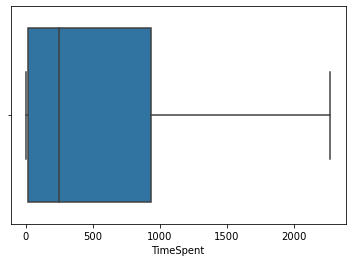

In [61]:
sns.boxplot(df_final['TimeSpent'])

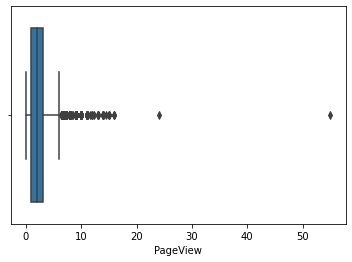

In [62]:
sns.boxplot(df_final['PageView'])

### There are some outliers in PageView

In [63]:
df_final.shape

(9240, 137)

## Before dealing with outliers lets check if there are duplicate records. They may contain duplicate outliers

In [64]:
# Count duplicate rows
len(df_final)-len(df_final.drop_duplicates())

1750

In [65]:
#There are 1896 duplicate rows. Lets remove these duplicate rows keeping first value.
df_final = df_final.drop_duplicates(keep='first')

In [66]:
df_final.shape

(7490, 137)

In [67]:
df_final['PageView'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    7490.000000
mean        2.912830
std         2.018944
min         0.000000
25%         2.000000
50%         2.500000
75%         4.000000
90%         5.000000
95%         6.000000
99%         9.110000
max        55.000000
Name: PageView, dtype: float64

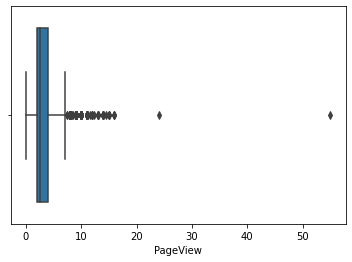

In [68]:
sns.boxplot(df_final['PageView'])

### Treating outliers

In [69]:
q = df_final['PageView'].quantile(0.99)
df_final = df_final[df_final['PageView'] < q]

In [70]:
df_final.shape

(7415, 137)

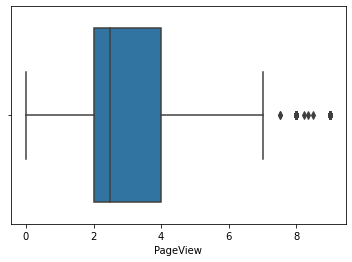

In [71]:
sns.boxplot(df_final['PageView'])

## Train Test Split

In [72]:
# Putting feature variable to X
X = df_final.drop(['Converted'], axis=1)
# Putting response variable to y
y = df_final['Converted']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [73]:
scaler = StandardScaler()
X_train[['TimeSpent','PageView']] = scaler.fit_transform(X_train[['TimeSpent','PageView']])

In [74]:
### Checking the Convertion Rate
Convetred = (sum(df_final['Converted'])/len(df_final['Converted'].index))*100
Convetred

39.635873229939314

### We have almost 40% conversion rate

## Model Building

### Model 1

In [75]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5190
Model:                            GLM   Df Residuals:                     5062
Model Family:                Binomial   Df Model:                          127
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 31 Aug 2020   Deviance:                          nan
Time:                        15:50:25   Pearson chi2:                 5.25e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                            -1.583e+27   7.28e+19  -2.18e+07      0.000   -1.58e+27   -1.58e+27
NoEmail                                          -8.589e+14    3.9e+06   -2.2e+08      0.000   -8.59e+14   -8.59e+14
NoCall                                            9.499e+14    4.8e+07   1.98e+07      0.000     9.5e+14     9.5e+14
TimeSpent                                         6.387e+14      1e+06   6.37e+08      0.000    6.39e+14    6.39e+14
PageView                                         -1.499e+14   1.42e+06  -1.05e+08      0.000    -1.5e+14    -1.5e+14
Search                                           -4.692e+14   2.62e+07  -1.79e+07      0.000   -4.69e+14   -4.69e+14
PaperArticle                                      2.366e+15   6.77e+07    3.5e+07      0.000    2.37e+15    2.37e+15
Forum                                            -3.611e+15   1.16e+08  -3.11e+07      0.000   -3.61e+15   -3.61e+15
Newspaper                                        -4.988e+15   6.79e+07  -7.34e+07      0.000   -4.99e+15   -4.99e+15
DigitalAd                                        -1.044e+15   3.92e+07  -2.67e+07      0.000   -1.04e+15   -1.04e+15
ThroughRecom                                      7.172e+14   3.47e+07   2.07e+07      0.000    7.17e+14    7.17e+14
Interview                                        -9.378e+13    3.6e+06   -2.6e+07      0.000   -9.38e+13   -9.38e+13
Lead Origin_Landing Page Submission              -3.945e+14   4.51e+06  -8.75e+07      0.000   -3.95e+14   -3.95e+14
Lead Origin_Lead Add Form                         1.558e+15    1.9e+07   8.18e+07      0.000    1.56e+15    1.56e+15
Lead Origin_Lead Import                          -3.745e+14    4.9e+07  -7.65e+06      0.000   -3.75e+14   -3.75e+14
Lead Origin_Quick Add Form                        2.766e+15   6.95e+07   3.98e+07      0.000    2.77e+15    2.77e+15
Lead Source_Direct Traffic                        1.583e+27   7.28e+19   2.18e+07      0.000    1.58e+27    1.58e+27
Lead Source_Facebook                              1.583e+27   7.28e+19   2.18e+07      0.000    1.58e+27    1.58e+27
Lead Source_Google                                1.583e+27   7.28e+19   2.18e+07      0.000    1.58e+27    1.58e+27
Lead Source_Live Chat                             1.583e+27   7.28e+19   2.18e+07      0.000    1.58e+27    1.58e+27
Lead Source_NC_EDM                                1.583e+27   7.28e+19   2.18e+07      0.000    1.58e+27    1.58e+27
Lead Source_Olark Chat                            1.583e+27   7.28e+19   2.18e+07      0.000    1.58e+27    1.58e+27
Lead Source_Organic Search                        1.583e+27   7.28e+19   2.18e+07      0.000    1.58e+27    1.58e+27
Lead Source_Pay per Click Ads            

## For 127 features, we should use RFE

In [76]:
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20) # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('NoEmail', True, 1),
 ('NoCall', False, 49),
 ('TimeSpent', True, 1),
 ('PageView', False, 47),
 ('Search', False, 34),
 ('PaperArticle', False, 25),
 ('Forum', False, 74),
 ('Newspaper', False, 21),
 ('DigitalAd', False, 52),
 ('ThroughRecom', False, 33),
 ('Interview', False, 78),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Origin_Quick Add Form', False, 86),
 ('Lead Source_Direct Traffic', False, 67),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 107),
 ('Lead Source_Live Chat', False, 85),
 ('Lead Source_NC_EDM', False, 7),
 ('Lead Source_Olark Chat', False, 71),
 ('Lead Source_Organic Search', False, 70),
 ('Lead Source_Pay per Click Ads', False, 79),
 ('Lead Source_Press_Release', False, 108),
 ('Lead Source_Reference', False, 37),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 55),
 ('Lead Source_WeLearn', False, 75),
 ('Lead

In [77]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['NoCall', 'PageView', 'Search', 'PaperArticle', 'Forum', 'Newspaper',
       'DigitalAd', 'ThroughRecom', 'Interview',
       'Lead Origin_Landing Page Submission',
       ...
       'LastNotableActivity_Email Marked Spam',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Email Received',
       'LastNotableActivity_Form Submitted on Website',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Resubscribed to emails',
       'LastNotableActivity_Unsubscribed',
       'LastNotableActivity_View in browser link Clicked'],
      dtype='object', length=116)

### Model 2

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5190
Model:                            GLM   Df Residuals:                     5169
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.5
Date:                Mon, 31 Aug 2020   Deviance:                       4159.0
Time:                        15:53:15   Pearson chi2:                 6.46e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.4737      0.098      4.830      0.000       0.281       0.666
NoEmail                                         -1.6087      0.198     -8.115      0.000      -1.997      -1.220
TimeSpent                                        1.0707      0.041     25.810      0.000       0.989       1.152
Lead Origin_Lead Add Form                        1.7840      0.275      6.492      0.000       1.245       2.323
Lead Source_Welingak Website                     3.2443      1.067      3.041      0.002       1.153       5.335
TotalVisits_1                                   -0.8489      0.242     -3.504      0.000      -1.324      -0.374
TotalVisits_17                                  -1.8376      1.133     -1.622      0.105      -4.058       0.383
TotalVisits_21                                   2.0403      1.279      1.595      0.111      -0.466       4.547
TotalVisits_24                                  22.8226   2.75e+04      0.001      0.999   -5.39e+04     5.4e+04
Country_unknown                                  0.9970      0.169      5.898      0.000       0.666       1.328
Specialization_Rural and Agribusiness            0.9700      0.368      2.635      0.008       0.249       1.691
HearAboutX_SMS                                  -1.5017      0.889     -1.690      0.091      -3.244       0.240
CurrentOccupation_Housewife                     23.3835    1.7e+04      0.001      0.999   -3.34e+04    3.34e+04
CurrentOccupation_Working Professional           2.4695      0.207     11.924      0.000       2.064       2.875
MattersMost_Flexibility & Convenience          -27.6655   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Profile_Not Given                          -2.0514      0.107    -19.250      0.000      -2.260      -1.843
Lead Profile_Other Leads                        -1.4816      0.173     -8.563      0.000      -1.821      -1.142
Lead Profile_Student of SomeSchool              -3.7835      0.491     -7.711      0.000      -4.745      -2.822
LastNotableActivity_Had a Phone Conversation     3.2050      1.152      2.781      0.005       0.946       5.464
LastNotableActivity_SMS Sent                     1.5644      0.090     17.374      0.000       1.388       1.741
LastNotableActivity_Unreachable                  1.6154      0.625      2.584      0.010       0.390       2.841
================================================================================================================
"""

### Model 3

In [79]:
# Drop 'TotalVisits_24' because p-value is high
X_train_sm1 = X_train_sm.drop(['TotalVisits_24'], axis=1)
X_train_sm = sm.add_constant(X_train_sm)
logm3 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5190
Model:                            GLM   Df Residuals:                     5170
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.0
Date:                Mon, 31 Aug 2020   Deviance:                       4163.9
Time:                        15:54:26   Pearson chi2:                 6.46e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.4742      0.098      4.833      0.000       0.282       0.666
NoEmail                                         -1.6110      0.198     -8.127      0.000      -2.000      -1.223
TimeSpent                                        1.0715      0.041     25.837      0.000       0.990       1.153
Lead Origin_Lead Add Form                        1.7834      0.275      6.491      0.000       1.245       2.322
Lead Source_Welingak Website                     3.2464      1.067      3.043      0.002       1.156       5.337
TotalVisits_1                                   -0.8511      0.242     -3.514      0.000      -1.326      -0.376
TotalVisits_17                                  -1.8392      1.133     -1.623      0.105      -4.060       0.381
TotalVisits_21                                   2.0384      1.279      1.594      0.111      -0.468       4.545
Country_unknown                                  0.9950      0.169      5.887      0.000       0.664       1.326
Specialization_Rural and Agribusiness            0.9671      0.368      2.627      0.009       0.246       1.689
HearAboutX_SMS                                  -1.5035      0.889     -1.692      0.091      -3.245       0.238
CurrentOccupation_Housewife                     23.3808    1.7e+04      0.001      0.999   -3.34e+04    3.34e+04
CurrentOccupation_Working Professional           2.4667      0.207     11.910      0.000       2.061       2.873
MattersMost_Flexibility & Convenience          -27.6602   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Profile_Not Given                          -2.0500      0.107    -19.237      0.000      -2.259      -1.841
Lead Profile_Other Leads                        -1.4698      0.173     -8.518      0.000      -1.808      -1.132
Lead Profile_Student of SomeSchool              -3.7836      0.491     -7.711      0.000      -4.745      -2.822
LastNotableActivity_Had a Phone Conversation     3.2037      1.152      2.780      0.005       0.945       5.462
LastNotableActivity_SMS Sent                     1.5664      0.090     17.400      0.000       1.390       1.743
LastNotableActivity_Unreachable                  1.6148      0.625      2.583      0.010       0.389       2.840
================================================================================================================
"""

### Model 4

In [80]:
# Drop 'CurrentOccupation_Housewife' because p-value is high
X_train_sm2 = X_train_sm1.drop(['CurrentOccupation_Housewife'], axis=1)
X_train_sm2 = sm.add_constant(X_train_sm2)
logm4 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5190
Model:                            GLM   Df Residuals:                     5171
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.7
Date:                Mon, 31 Aug 2020   Deviance:                       4173.4
Time:                        15:55:04   Pearson chi2:                 6.50e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.4739      0.098      4.832      0.000       0.282       0.666
NoEmail                                         -1.6142      0.198     -8.145      0.000      -2.003      -1.226
TimeSpent                                        1.0690      0.041     25.805      0.000       0.988       1.150
Lead Origin_Lead Add Form                        1.8186      0.274      6.636      0.000       1.281       2.356
Lead Source_Welingak Website                     3.2115      1.067      3.011      0.003       1.121       5.302
TotalVisits_1                                   -0.8559      0.242     -3.535      0.000      -1.330      -0.381
TotalVisits_17                                  -1.8379      1.133     -1.623      0.105      -4.058       0.382
TotalVisits_21                                   2.0357      1.278      1.592      0.111      -0.470       4.541
Country_unknown                                  0.9912      0.169      5.870      0.000       0.660       1.322
Specialization_Rural and Agribusiness            0.9614      0.368      2.612      0.009       0.240       1.683
HearAboutX_SMS                                  -1.5027      0.888     -1.693      0.090      -3.243       0.237
CurrentOccupation_Working Professional           2.4606      0.207     11.883      0.000       2.055       2.866
MattersMost_Flexibility & Convenience          -25.6866   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Profile_Not Given                          -2.0459      0.107    -19.210      0.000      -2.255      -1.837
Lead Profile_Other Leads                        -1.4426      0.171     -8.417      0.000      -1.779      -1.107
Lead Profile_Student of SomeSchool              -3.7803      0.491     -7.706      0.000      -4.742      -2.819
LastNotableActivity_Had a Phone Conversation     3.1994      1.152      2.777      0.005       0.941       5.458
LastNotableActivity_SMS Sent                     1.5630      0.090     17.375      0.000       1.387       1.739
LastNotableActivity_Unreachable                  1.6123      0.625      2.580      0.010       0.388       2.837
================================================================================================================
"""

### Model 5

In [81]:
# Drop 'MattersMost_Flexibility & Convenience' because p-value is high
X_train_sm3 = X_train_sm2.drop(['MattersMost_Flexibility & Convenience'], axis=1)
X_train_sm3 = sm.add_constant(X_train_sm3)
logm5 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5190
Model:                            GLM   Df Residuals:                     5172
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2091.8
Date:                Mon, 31 Aug 2020   Deviance:                       4183.5
Time:                        15:56:34   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.4696      0.098      4.798      0.000       0.278       0.661
NoEmail                                         -1.6092      0.198     -8.136      0.000      -1.997      -1.222
TimeSpent                                        1.0681      0.041     25.814      0.000       0.987       1.149
Lead Origin_Lead Add Form                        1.7672      0.271      6.514      0.000       1.235       2.299
Lead Source_Welingak Website                     3.2590      1.066      3.058      0.002       1.170       5.348
TotalVisits_1                                   -0.8549      0.242     -3.538      0.000      -1.329      -0.381
TotalVisits_17                                  -1.8386      1.133     -1.623      0.105      -4.058       0.381
TotalVisits_21                                   2.0343      1.278      1.592      0.111      -0.470       4.539
Country_unknown                                  0.9900      0.169      5.871      0.000       0.659       1.320
Specialization_Rural and Agribusiness            0.9608      0.368      2.614      0.009       0.240       1.681
HearAboutX_SMS                                  -1.4961      0.886     -1.688      0.091      -3.233       0.241
CurrentOccupation_Working Professional           2.4204      0.205     11.823      0.000       2.019       2.822
Lead Profile_Not Given                          -2.0393      0.106    -19.188      0.000      -2.248      -1.831
Lead Profile_Other Leads                        -1.4319      0.171     -8.375      0.000      -1.767      -1.097
Lead Profile_Student of SomeSchool              -3.7736      0.490     -7.697      0.000      -4.735      -2.813
LastNotableActivity_Had a Phone Conversation     3.1981      1.152      2.777      0.005       0.941       5.456
LastNotableActivity_SMS Sent                     1.5628      0.090     17.391      0.000       1.387       1.739
LastNotableActivity_Unreachable                  1.6156      0.624      2.590      0.010       0.393       2.838
================================================================================================================
"""

### Model 6

In [82]:
# Drop 'TotalVisits_21' because p-value is high
X_train_sm4 = X_train_sm3.drop(['TotalVisits_21'], axis=1)
X_train_sm4 = sm.add_constant(X_train_sm4)
logm6 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5190
Model:                            GLM   Df Residuals:                     5173
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2093.3
Date:                Mon, 31 Aug 2020   Deviance:                       4186.6
Time:                        16:11:34   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.4737      0.098      4.842      0.000       0.282       0.665
NoEmail                                         -1.6110      0.198     -8.146      0.000      -1.999      -1.223
TimeSpent                                        1.0683      0.041     25.823      0.000       0.987       1.149
Lead Origin_Lead Add Form                        1.7666      0.271      6.511      0.000       1.235       2.298
Lead Source_Welingak Website                     3.2592      1.066      3.058      0.002       1.170       5.348
TotalVisits_1                                   -0.8579      0.242     -3.550      0.000      -1.332      -0.384
TotalVisits_17                                  -1.8409      1.132     -1.626      0.104      -4.060       0.379
Country_unknown                                  0.9878      0.169      5.860      0.000       0.657       1.318
Specialization_Rural and Agribusiness            0.9584      0.368      2.607      0.009       0.238       1.679
HearAboutX_SMS                                  -1.4977      0.886     -1.691      0.091      -3.234       0.238
CurrentOccupation_Working Professional           2.4181      0.205     11.813      0.000       2.017       2.819
Lead Profile_Not Given                          -2.0393      0.106    -19.196      0.000      -2.247      -1.831
Lead Profile_Other Leads                        -1.4349      0.171     -8.394      0.000      -1.770      -1.100
Lead Profile_Student of SomeSchool              -3.7770      0.490     -7.704      0.000      -4.738      -2.816
LastNotableActivity_Had a Phone Conversation     3.1942      1.152      2.773      0.006       0.937       5.452
LastNotableActivity_SMS Sent                     1.5591      0.090     17.359      0.000       1.383       1.735
LastNotableActivity_Unreachable                  1.6123      0.624      2.585      0.010       0.390       2.835
================================================================================================================
"""

## Checking VIF

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_sm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.13
3,Lead Origin_Lead Add Form,1.99
7,Country_unknown,1.86
11,Lead Profile_Not Given,1.53
12,Lead Profile_Other Leads,1.29
4,Lead Source_Welingak Website,1.17
13,Lead Profile_Student of SomeSchool,1.16
10,CurrentOccupation_Working Professional,1.10
2,TimeSpent,1.09
15,LastNotableActivity_SMS Sent,1.06


### Model 7

In [84]:
# Drop 'HearAboutX_SMS' because p-value is high
X_train_sm5 = X_train_sm4.drop(['HearAboutX_SMS'], axis=1)
X_train_sm5 = sm.add_constant(X_train_sm5)
logm7 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5190
Model:                            GLM   Df Residuals:                     5174
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2095.0
Date:                Mon, 31 Aug 2020   Deviance:                       4189.9
Time:                        16:13:16   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.4713      0.098      4.818      0.000       0.280       0.663
NoEmail                                         -1.6114      0.198     -8.156      0.000      -1.999      -1.224
TimeSpent                                        1.0675      0.041     25.818      0.000       0.986       1.149
Lead Origin_Lead Add Form                        1.7665      0.271      6.512      0.000       1.235       2.298
Lead Source_Welingak Website                     3.2583      1.066      3.057      0.002       1.169       5.347
TotalVisits_1                                   -0.8544      0.242     -3.536      0.000      -1.328      -0.381
TotalVisits_17                                  -1.8269      1.131     -1.615      0.106      -4.043       0.390
Country_unknown                                  0.9912      0.169      5.881      0.000       0.661       1.322
Specialization_Rural and Agribusiness            0.9170      0.365      2.509      0.012       0.201       1.633
CurrentOccupation_Working Professional           2.4089      0.204     11.793      0.000       2.009       2.809
Lead Profile_Not Given                          -2.0399      0.106    -19.198      0.000      -2.248      -1.832
Lead Profile_Other Leads                        -1.4348      0.171     -8.401      0.000      -1.769      -1.100
Lead Profile_Student of SomeSchool              -3.7746      0.490     -7.700      0.000      -4.735      -2.814
LastNotableActivity_Had a Phone Conversation     3.1970      1.152      2.776      0.006       0.940       5.454
LastNotableActivity_SMS Sent                     1.5593      0.090     17.367      0.000       1.383       1.735
LastNotableActivity_Unreachable                  1.5444      0.632      2.442      0.015       0.305       2.784
================================================================================================================
"""

### Model 8

In [85]:
# Drop 'TotalVisits_17' because p-value is high
X_train_sm6 = X_train_sm5.drop('TotalVisits_17', axis=1)
X_train_sm6 = sm.add_constant(X_train_sm6)
logm8 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5190
Model:                            GLM   Df Residuals:                     5175
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2096.7
Date:                Mon, 31 Aug 2020   Deviance:                       4193.5
Time:                        16:13:55   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.4687      0.098      4.797      0.000       0.277       0.660
NoEmail                                         -1.6089      0.197     -8.148      0.000      -1.996      -1.222
TimeSpent                                        1.0663      0.041     25.814      0.000       0.985       1.147
Lead Origin_Lead Add Form                        1.7747      0.271      6.545      0.000       1.243       2.306
Lead Source_Welingak Website                     3.2576      1.066      3.056      0.002       1.169       5.347
TotalVisits_1                                   -0.8499      0.241     -3.519      0.000      -1.323      -0.377
Country_unknown                                  0.9837      0.168      5.847      0.000       0.654       1.313
Specialization_Rural and Agribusiness            0.8638      0.365      2.368      0.018       0.149       1.579
CurrentOccupation_Working Professional           2.4120      0.204     11.809      0.000       2.012       2.812
Lead Profile_Not Given                          -2.0407      0.106    -19.224      0.000      -2.249      -1.833
Lead Profile_Other Leads                        -1.4311      0.171     -8.383      0.000      -1.766      -1.097
Lead Profile_Student of SomeSchool              -3.7705      0.490     -7.693      0.000      -4.731      -2.810
LastNotableActivity_Had a Phone Conversation     3.1997      1.152      2.778      0.005       0.942       5.457
LastNotableActivity_SMS Sent                     1.5607      0.090     17.390      0.000       1.385       1.737
LastNotableActivity_Unreachable                  1.5475      0.632      2.447      0.014       0.308       2.787
================================================================================================================
"""

### All features have low P value

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_sm6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.13
3,Lead Origin_Lead Add Form,1.99
6,Country_unknown,1.86
9,Lead Profile_Not Given,1.53
10,Lead Profile_Other Leads,1.29
4,Lead Source_Welingak Website,1.17
11,Lead Profile_Student of SomeSchool,1.16
8,CurrentOccupation_Working Professional,1.10
2,TimeSpent,1.09
13,LastNotableActivity_SMS Sent,1.06


### There seems to be no issue of Multicollenearity

In [89]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm6)
y_train_pred[:10]

6534    0.809940
9175    0.396776
4533    0.686203
1564    0.887969
5304    0.971399
5602    0.914143
1272    0.076669
4793    0.996211
1432    0.683969
7210    0.263225
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.80993967, 0.39677624, 0.68620298, 0.88796876, 0.97139899,
       0.91414281, 0.07666922, 0.99621069, 0.6839691 , 0.26322468])

### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [91]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID
0,1,0.809940,6534
1,0,0.396776,9175
2,0,0.686203,4533
3,1,0.887969,1564
4,1,0.971399,5304


### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [92]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head() # Let's see the head

,Convert,Convert_Prob,LeadID,predicted
0,1,0.809940,6534,1
1,0,0.396776,9175,0
2,0,0.686203,4533,1
3,1,0.887969,1564,1
4,1,0.971399,5304,1


In [93]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[2786  370]
 [ 590 1444]]


In [94]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.815028901734104


### Plotting the ROC Curve

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

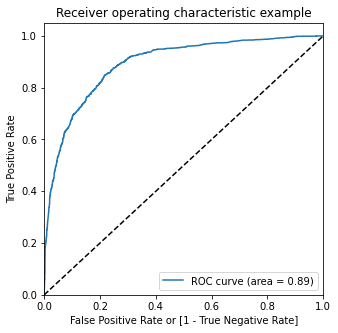

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.809940,6534,1,1,1,1,1,1,1,1,1,1,0
1,0,0.396776,9175,0,1,1,1,1,0,0,0,0,0,0
2,0,0.686203,4533,1,1,1,1,1,1,1,1,0,0,0
3,1,0.887969,1564,1,1,1,1,1,1,1,1,1,1,0
4,1,0.971399,5304,1,1,1,1,1,1,1,1,1,1,1


In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.391908     1.000000     0.000000
0.1   0.1  0.650096     0.962635     0.448669
0.2   0.2  0.772062     0.924287     0.673954
0.3   0.3  0.800771     0.875615     0.752535
0.4   0.4  0.810405     0.787611     0.825095
0.5   0.5  0.815029     0.709931     0.882763
0.6   0.6  0.809249     0.634218     0.922053
0.7   0.7  0.791715     0.556539     0.943283
0.8   0.8  0.761464     0.440511     0.968314
0.9   0.9  0.707514     0.271878     0.988276


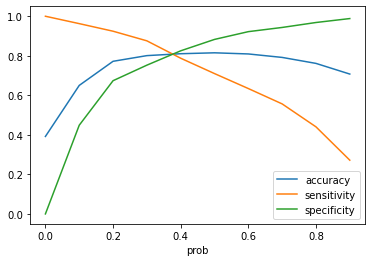

In [99]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [100]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.809940,6534,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.396776,9175,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.686203,4533,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.887969,1564,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.971399,5304,1,1,1,1,1,1,1,1,1,1,1,1


In [101]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8090558766859345

### Making predictions on the test set

In [102]:
X_test[['TimeSpent','PageView']] = scaler.transform(X_test[['TimeSpent','PageView']])
X_test1 = sm.add_constant(X_test)
X_test_sm = X_test1[X_train_sm6.columns]
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Convert_Prob'], axis=1)
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.38 else 0)
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.813932584269663

## The model is performing better on test data than on train data ! Excellent

### Assign lead score between 0 and 100

In [103]:
y_pred_final['Score'] = y_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final['Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))

In [104]:
num = [10,20,30,40,50,60,70,80,90]
for i in num:
    getConversion_rate = y_train_pred_final[y_train_pred_final['Score'] >i]
    totalActualConvertion = getConversion_rate['Convert'].sum()
    totalLeads = getConversion_rate['Score'].count()
    print('Conversion rate at Score above ' + str(i) + ': ' + str(round(100*totalActualConvertion/totalLeads,2)))

Conversion rate at Score above 10: 54.19
Conversion rate at Score above 20: 64.91
Conversion rate at Score above 30: 69.64
Conversion rate at Score above 40: 74.77
Conversion rate at Score above 50: 79.73
Conversion rate at Score above 60: 84.33
Conversion rate at Score above 70: 86.59
Conversion rate at Score above 80: 90.35
Conversion rate at Score above 90: 93.82


### So, Leads with score above 50 are hot leads.  
#### The edutech company should prioritize leads with Score more than 50 to get expected conversion rate of about 80%

    Top three contributing variables are:
    • Lead Source_Welingak Website	with +3.2576 coefficient
    • LastNotableActivity_Had a Phone Conversation	with +3.1997 coefficient
    • CurrentOccupation_Working Professional with	+2.4120 coefficient
Above variables are contributing most because coefficient values of these variables in the logistic regression model are the highest three values.

    

If The Education company wants to aggressively increase the conversion rate, it has to go for leads with scores of 0.38 or more.

 Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls.

 In this case the Edutech company should consider leads with higher scores than 60. If they give phone call to leads with Score 80 or above, conversion rate is expected to be around 90% from the given data.